# (Разведочный анализ данных) Exploratory data analisys


- AREA_TYPE : тип района, где расположен объект недвижимости.
- AVAILABILITY : доступна ли недвижимость в настоящее время или нет.
- LOCATION : Место, где находится недвижимость.
- SIZE : Количество спален
- SOCIETY : Тип района, в котором находится собственность.
- TOTAL_SQFT : общая площадь объекта в квадратных футах.
- BATH : Количество ванных комнат
- BALCONY : Количество балконов
- PRICE : Стоимость недвижимости в лакхах¶

В качестве задания вам предлагается повторить данные действия для набора данных
- [Somerville Happiness Survey Data Set](http://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yakushinav/omo/main/data/Bengaluru_House_Data.csv')
print(df.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society  total_sqft  bath  balcony   price  
0  Coomee       1056.0   2.0      1.0   39.07  
1  Theanmp      2600.0   5.0      3.0  120.00  
2      NaN      1440.0   2.0      3.0   62.00  
3  Soiewre      1521.0   3.0      1.0   95.00  
4      NaN      1200.0   2.0      1.0   51.00  


In [3]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
len(df.columns)

9

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13317 entries, 0 to 13316
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13287 non-null  object 
 1   availability  13287 non-null  object 
 2   location      13286 non-null  object 
 3   size          13271 non-null  object 
 4   society       7807 non-null   object 
 5   total_sqft    13287 non-null  float64
 6   bath          13214 non-null  float64
 7   balcony       12679 non-null  float64
 8   price         13287 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.5+ KB


# Смотрим на каждый признак в отдельности

## Что нас интересует?
- Тип (числовая / категориальная)
- Смысл
- Влияние на целевую переменную

В итоге анализа делаем __вывод__.

## Целевая переменная 

In [6]:
df['price'].describe()

count    13287.000000
mean       112.463371
std        149.025292
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

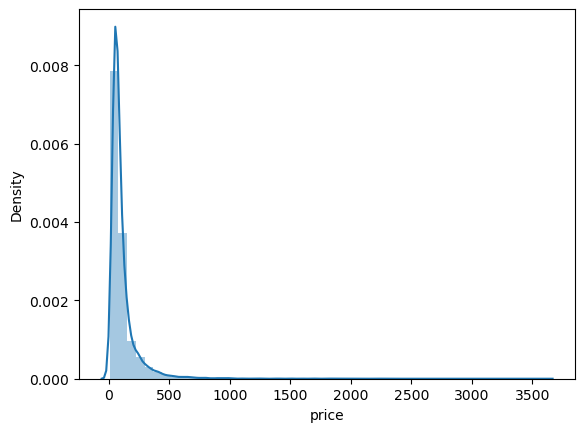

In [7]:
sns.distplot(df['price']);

In [8]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 8.074718
Kurtosis: 108.296867


- Распределение отличается от нормального
- Коэффициент асимметрии > 0
- Коэффициент эксцесса (островершинности)  — мера остроты пика распределения случайной величины


## 1 Анализ пропущенных значений

In [9]:
df.isnull().sum()

area_type         30
availability      30
location          31
size              46
society         5510
total_sqft        30
bath             103
balcony          638
price             30
dtype: int64

<Axes: >

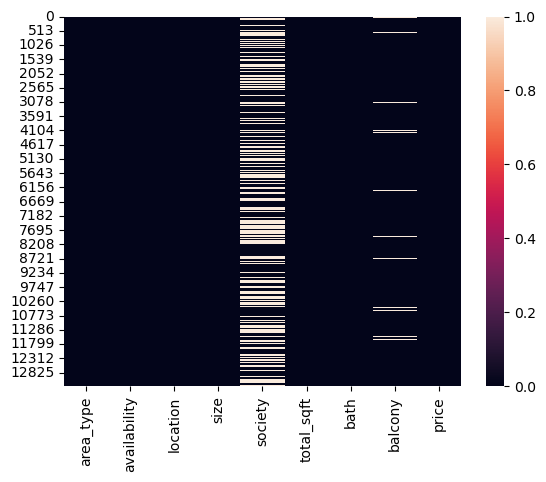

In [10]:
sns.heatmap(df.isnull())

In [11]:
(df.isnull().sum()/len(df))*100

area_type        0.225276
availability     0.225276
location         0.232785
size             0.345423
society         41.375685
total_sqft       0.225276
bath             0.773447
balcony          4.790869
price            0.225276
dtype: float64

## Категориальные переменные

In [12]:
#40% данных в поле society пропущено. Удаляем
df.drop('society',axis=1,inplace=True)

In [13]:
#Заменяем пропущенные значения на моду
df.location.replace(to_replace=np.NaN,value=df.location.mode()[0],inplace=True)
df.area_type.replace(to_replace=np.NaN,value=df.area_type.mode()[0],inplace=True)

In [14]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
#Поле size содержит данные такого вида 2 BHK. Выделим число отдельно
df['size']=df['size'].str.split(' ',expand=True)[0].astype(np.number)
df.bath=df.bath.astype(np.number)

/Users/iveeliz/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
/Users/iveeliz/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [16]:
df['size'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [17]:
#Заменим на бинарный признак доступно/недоступно
df.availability=(df.availability=='Ready To Move')
df.availability.replace({True:1,False:0},inplace=True)
df.availability=df.availability.astype(object)
df.availability.head()

0    0
1    1
2    1
3    1
4    1
Name: availability, dtype: object

In [18]:
df.isnull().sum() 

area_type         0
availability      0
location          0
size             46
total_sqft       30
bath            103
balcony         638
price            30
dtype: int64

## Числовые переменные

In [19]:
#Заменяем пропуски в данных на конкретное значение
df.bath=df.bath.astype(np.number)
df['bath'] = df['bath'].fillna(1)
df.balcony = df.balcony.astype(np.number)
df['balcony'] = df['balcony'].fillna(0)
# df.size=df.size.astype(np.number)
df['size'] = df['size'].fillna(1)


/Users/iveeliz/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
/Users/iveeliz/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [20]:
#Заменяем пропуски в данных на основе интерполяции
df['total_sqft'] = df['total_sqft'].interpolate(method='polynomial', order=2)
df['price'] = df['price'].interpolate(method='polynomial', order=2)


<Axes: >

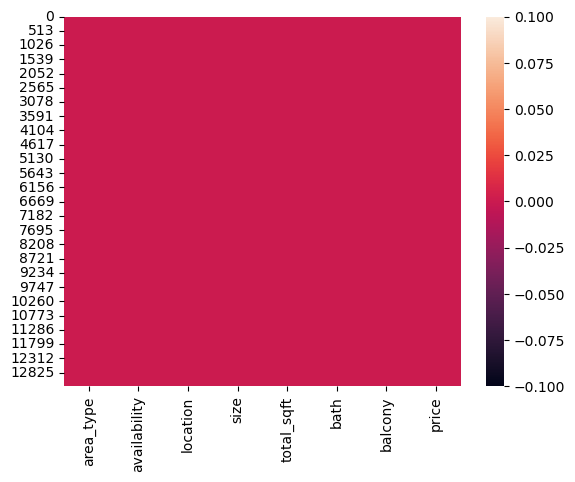

In [21]:
sns.heatmap(df.isnull())

In [22]:
(df.isnull().sum()/len(df))*100

area_type       0.0
availability    0.0
location        0.0
size            0.0
total_sqft      0.0
bath            0.0
balcony         0.0
price           0.0
dtype: float64

## 2 Удаление выбросов

<Axes: >

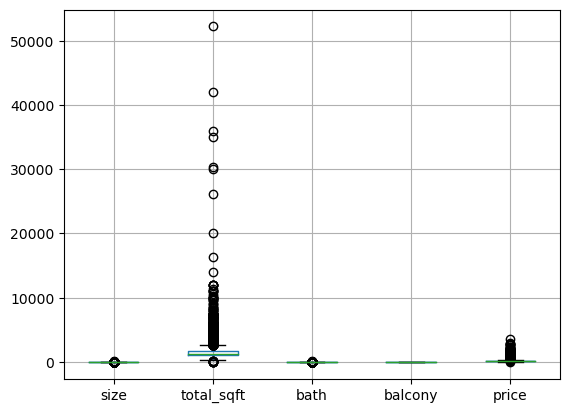

In [23]:
df.boxplot()

In [24]:
df.shape

(13317, 8)

In [25]:
# # Удалим выбросы, которые выходят далеко за 1 и 3 квартили
# q1 = df.quantile(0.25)
# q3 = df.quantile(0.75)
# IQR = q3-q1
# IQR

# df = df[~((df) > (q3 + (1.5 * IQR))).any(axis=1)]

# df.head()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13317 entries, 0 to 13316
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13317 non-null  object 
 1   availability  13317 non-null  object 
 2   location      13317 non-null  object 
 3   size          13317 non-null  float64
 4   total_sqft    13317 non-null  float64
 5   bath          13317 non-null  float64
 6   balcony       13317 non-null  float64
 7   price         13317 non-null  float64
dtypes: float64(5), object(3)
memory usage: 832.4+ KB


In [27]:
# Выделяем только числовые столбцы с float64
df_float = df.select_dtypes(include=['float64'])
q1 = df_float.quantile(0.25)
q3 = df_float.quantile(0.75)
IQR = q3 - q1

df = df[~((df_float < (q1 - 1.5 * IQR)) | (df_float > (q3 + 1.5 * IQR))).any(axis=1)]

df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00
5,Super built-up Area,1,Whitefield,2.0,1170.0,2.0,1.0,38.00


<Axes: >

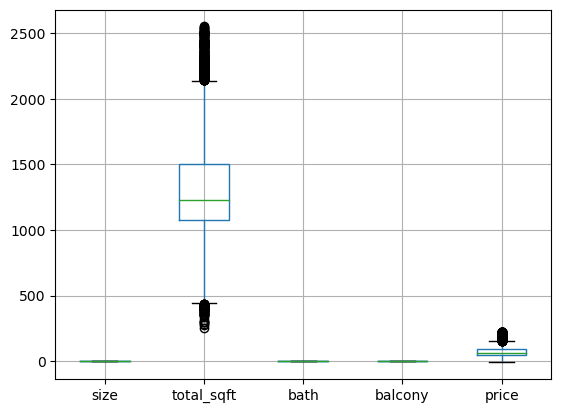

In [28]:
df.boxplot()

In [29]:
df.shape

(11109, 8)

## 3. Разведочный анализ

<Axes: ylabel='price'>

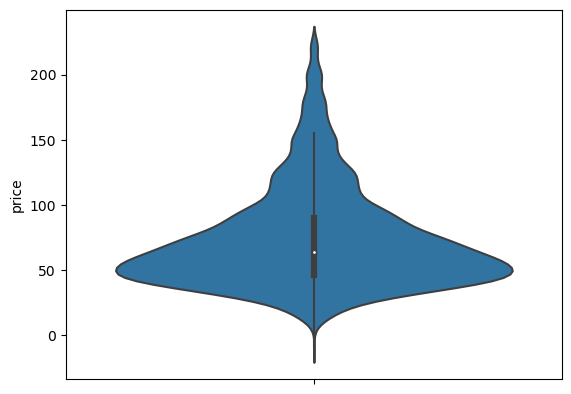

In [30]:
sns.violinplot(y = df.price)

Text(0, 0.5, 'Доступность')

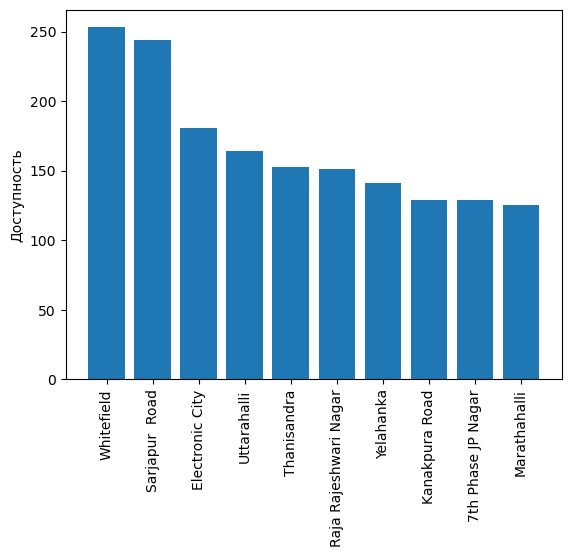

In [31]:
# Распределение недвижимости по доступности и локации
plt.bar(x=df[df['availability'] == 1].groupby('location')['availability'].agg('count').sort_values(ascending=False).head(10).index,height=df[df['availability'] == 1].groupby('location')['availability'].agg('count').sort_values(ascending=False).head(10))
plt.xticks(rotation=90)
plt.ylabel('Доступность')

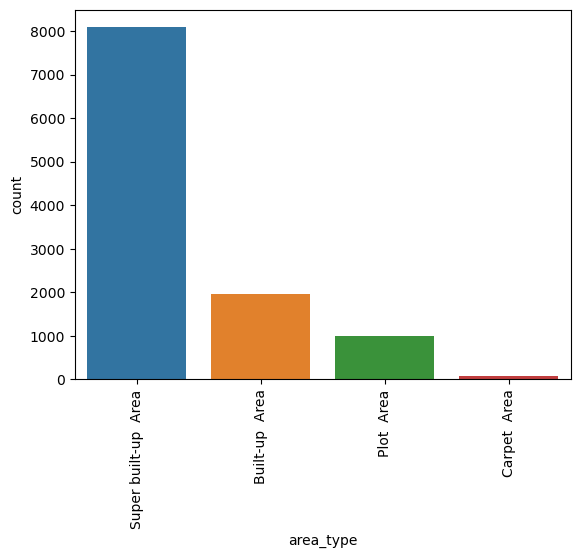

In [32]:
# Распределение данных по типу недвижимости
sns.countplot(x='area_type', data=df)
plt.xticks(rotation = 90)
plt.show()

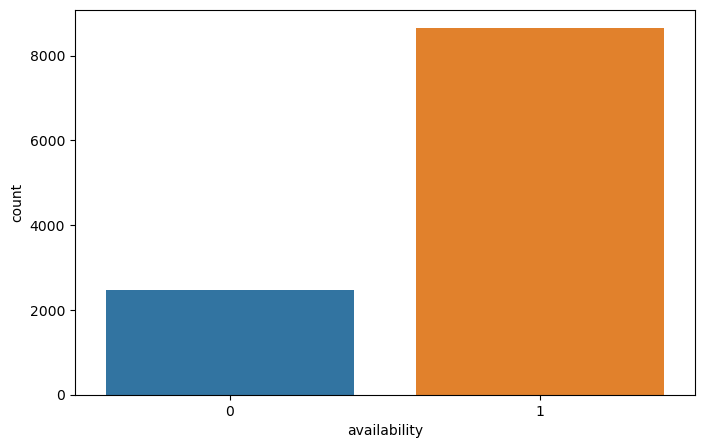

In [33]:
# Распределение по доступности
plt.figure(figsize=(8, 5))
sns.countplot(x='availability', data=df)
plt.show()

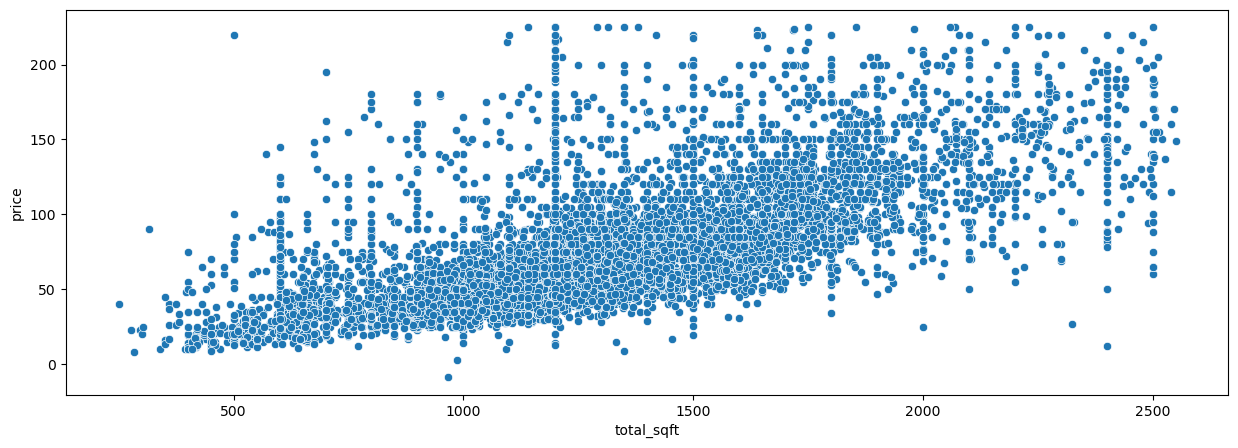

In [34]:
# Зависимость цены от площади
plt.figure(figsize=(15,5))
sns.scatterplot(x="total_sqft", y="price", data=df)
plt.show()

Text(0.5, 0, 'Количество спален')

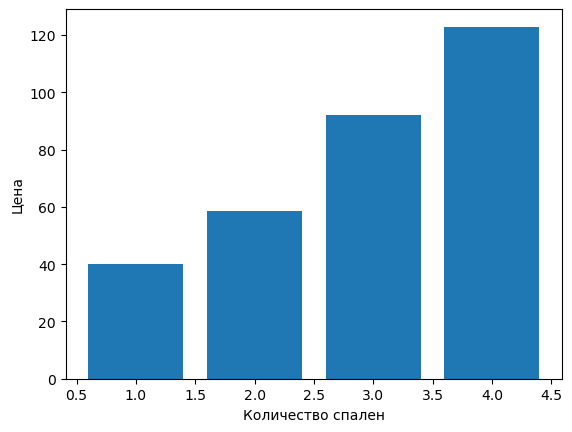

In [35]:
# Распределение по количеству спален
df10 = df.copy()
df10['size'] = np.round(df10['size'])
plt.bar(x=df10.groupby('size')['price'].agg('mean').sort_values(ascending=False).head(10).index,height=df10.groupby('size')['price'].agg('mean').sort_values(ascending=False).head(10))
plt.ylabel('Цена')
plt.xlabel('Количество спален')

# Самые дорогие районы в Бангалоре

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'GKW Layout'),
  Text(1, 0, 'Yediyur'),
  Text(2, 0, 'Brigade Road'),
  Text(3, 0, 'frazertown'),
  Text(4, 0, 'Ramaswamy Palya - Kammanahalli Main Road'),
  Text(5, 0, 'Dairy Circle'),
  Text(6, 0, 'Postal Colony'),
  Text(7, 0, '2nd phase jp nagar, jp nagar'),
  Text(8, 0, 'Near ullas theater'),
  Text(9, 0, 'CR Layout')])

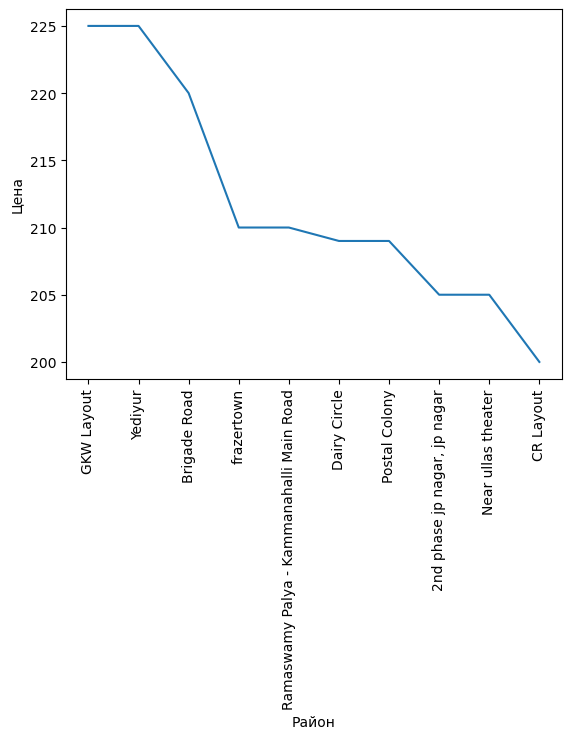

In [36]:
plt.plot(df.groupby(by='location')['price'].agg('mean').sort_values(ascending=False).head(10))
plt.xlabel('Район')
plt.ylabel('Цена')
plt.xticks(rotation=90)

# Самые дорогие районы в Бангалоре по отношению цена/площадь

In [37]:
df['per_sqft'] = df['price']/df['total_sqft']

Text(0, 0.5, 'Average Price / Sq.ft in Lakhs')

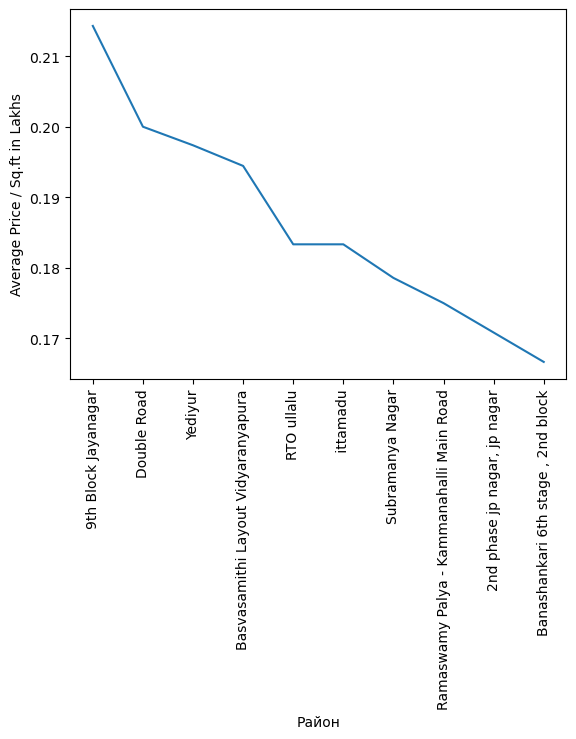

In [38]:
plt.plot(df.groupby(by='location')['per_sqft'].agg('mean').sort_values(ascending=False).head(10))
plt.xticks(rotation = 90)
plt.xlabel('Район')
plt.ylabel('Average Price / Sq.ft in Lakhs')

In [39]:
df = df.drop('per_sqft',axis=1)

In [40]:
# Тепловая карта
# plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(), annot=True,cbar=False)
# plt.show()

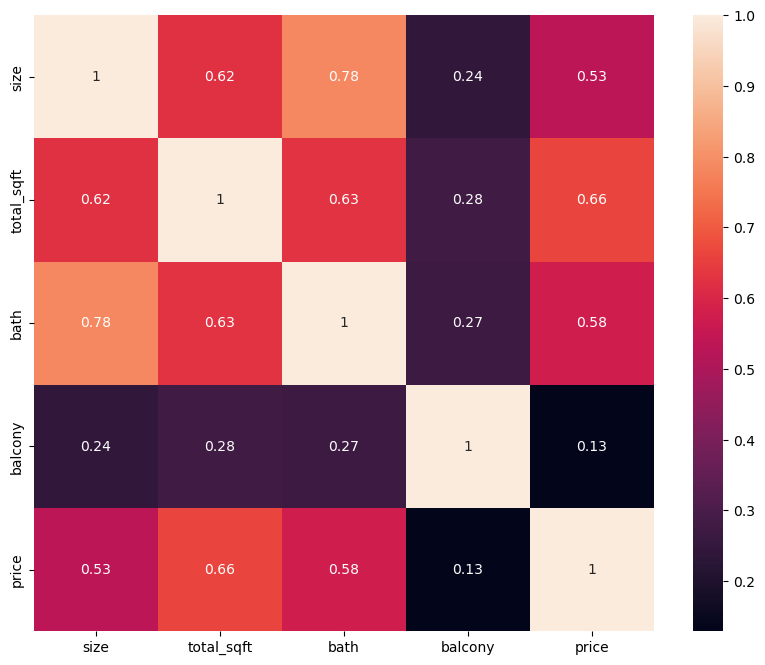

In [41]:
# Оставим только числовые столбцы
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cbar=True)
plt.show()

## Стандартизация

In [42]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00
5,Super built-up Area,1,Whitefield,2.0,1170.0,2.0,1.0,38.00


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11109 entries, 0 to 13316
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     11109 non-null  object 
 1   availability  11109 non-null  object 
 2   location      11109 non-null  object 
 3   size          11109 non-null  float64
 4   total_sqft    11109 non-null  float64
 5   bath          11109 non-null  float64
 6   balcony       11109 non-null  float64
 7   price         11109 non-null  float64
dtypes: float64(5), object(3)
memory usage: 781.1+ KB


In [44]:
# Выдлим категориальные и числовые признаки
data_cat=df.select_dtypes(exclude=np.number)
data_num=df.select_dtypes(np.number)
data_cat=data_cat.reset_index()

In [45]:
# Стандартизация это перевод к виду Среднее значение = 0, стандартное отклонение = 1
ss=StandardScaler()
data_num_scaled=pd.DataFrame(ss.fit_transform(data_num),columns=data_num.columns)
data_num_scaled=data_num_scaled.reset_index()
data_num_scaled.head()

,index,size,total_sqft,bath,balcony,price
0,0,-0.636462,-0.627294,-0.422930,-0.633655,-0.900652
1,1,0.840859,0.385430,-0.422930,1.839737,-0.304312
2,2,0.840859,0.599052,1.069077,-0.633655,0.553919
3,3,-0.636462,-0.247522,-0.422930,-0.633655,-0.590388
4,4,-0.636462,-0.326641,-0.422930,-0.633655,-0.928479


In [46]:
# Соединяем данные
df=pd.concat([data_num_scaled,data_cat],axis=1).drop('index',axis=1)
df.head()

,size,total_sqft,bath,balcony,price,area_type,availability,location
0,-0.636462,-0.627294,-0.422930,-0.633655,-0.900652,Super built-up Area,0,Electronic City Phase II
1,0.840859,0.385430,-0.422930,1.839737,-0.304312,Built-up Area,1,Uttarahalli
2,0.840859,0.599052,1.069077,-0.633655,0.553919,Super built-up Area,1,Lingadheeranahalli
3,-0.636462,-0.247522,-0.422930,-0.633655,-0.590388,Super built-up Area,1,Kothanur
4,-0.636462,-0.326641,-0.422930,-0.633655,-0.928479,Super built-up Area,1,Whitefield


# Далее заменяем категориальные данные на числовые коды

In [47]:
# Заменим категориальные данные на числовые коды из словаря
encoder = LabelEncoder()
df['location'] = encoder.fit_transform(df['location'])
df['location'] = df['location'].astype(np.number)


/Users/iveeliz/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [48]:
# Заменим категориальные данные на бинарные поля
df=pd.get_dummies(df,columns=['area_type'])
df.head()

,size,total_sqft,bath,balcony,price,availability,location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,-0.636462,-0.627294,-0.422930,-0.633655,-0.900652,0,352.0,False,False,False,True
1,0.840859,0.385430,-0.422930,1.839737,-0.304312,1,1004.0,True,False,False,False
2,0.840859,0.599052,1.069077,-0.633655,0.553919,1,648.0,False,False,False,True
3,-0.636462,-0.247522,-0.422930,-0.633655,-0.590388,1,614.0,False,False,False,True
4,-0.636462,-0.326641,-0.422930,-0.633655,-0.928479,1,1065.0,False,False,False,True


In [49]:
print(df.head())

       size  total_sqft      bath   balcony     price availability  location  \
0 -0.636462   -0.627294 -0.422930 -0.633655 -0.900652            0     352.0   
1  0.840859    0.385430 -0.422930  1.839737 -0.304312            1    1004.0   
2  0.840859    0.599052  1.069077 -0.633655  0.553919            1     648.0   
3 -0.636462   -0.247522 -0.422930 -0.633655 -0.590388            1     614.0   
4 -0.636462   -0.326641 -0.422930 -0.633655 -0.928479            1    1065.0   

   area_type_Built-up  Area  area_type_Carpet  Area  area_type_Plot  Area  \
0                     False                   False                 False   
1                      True                   False                 False   
2                     False                   False                 False   
3                     False                   False                 False   
4                     False                   False                 False   

   area_type_Super built-up  Area  
0                   

# Повторяем действия для SomervilleHappinessSurvey2015

1. D = decision attribute (D) with values 0 (unhappy) and 1 (happy)2. 
X1 = the availability of information about the city services3. 
X2 = the cost of housin4. g
X3 = the overall quality of public schoo5. ls
X4 = your trust in the local pol6. ice
X5 = the maintenance of streets and sidewa7. lks 
X6 = the availability of social community eventsevents

In [50]:
df = pd.read_excel('data/SomervilleHappinessSurvey2015.xlsx', header=[1])
print(df.head())

   D  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5


In [51]:
df.columns

Index(['D', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [52]:
len(df.columns)

7

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   D       143 non-null    int64
 1   X1      143 non-null    int64
 2   X2      143 non-null    int64
 3   X3      143 non-null    int64
 4   X4      143 non-null    int64
 5   X5      143 non-null    int64
 6   X6      143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [54]:
df.shape

(143, 7)

## Целевая переменная 

In [55]:
df['D'].describe()

count    143.000000
mean       0.538462
std        0.500271
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: D, dtype: float64

<Axes: xlabel='D', ylabel='Density'>

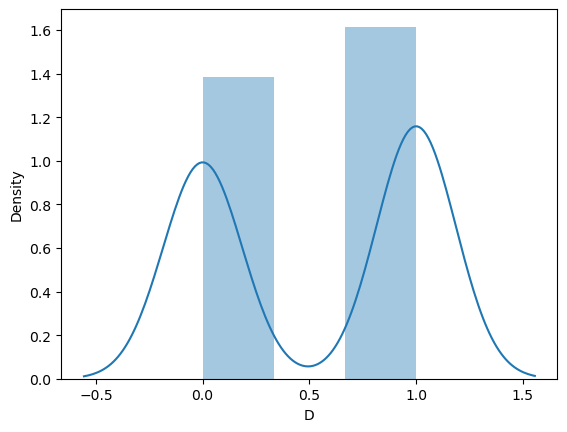

In [56]:
sns.distplot(df['D'])

In [57]:
print("Skewness: %f" % df['D'].skew())
print("Kurtosis: %f" % df['D'].kurt())

Skewness: -0.155944
Kurtosis: -2.003908


Целевая переменная – категориальная

## 1 Анализ пропущенных значений

In [58]:
df.isnull().sum()

D     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

<Axes: >

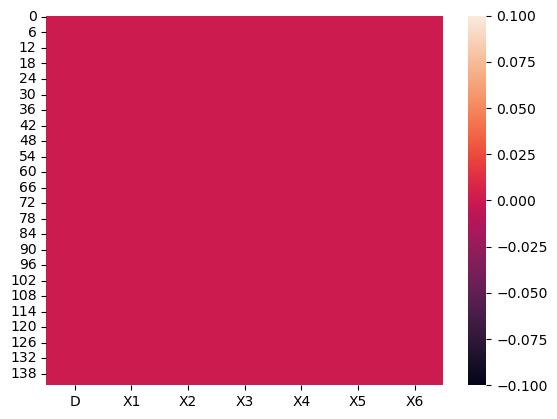

In [59]:
sns.heatmap(df.isnull())

In [60]:
(df.isnull().sum()/len(df))*100

D     0.0
X1    0.0
X2    0.0
X3    0.0
X4    0.0
X5    0.0
X6    0.0
dtype: float64

Пропущенных значений нет :)

## 2 Удаление выбросов

<Axes: >

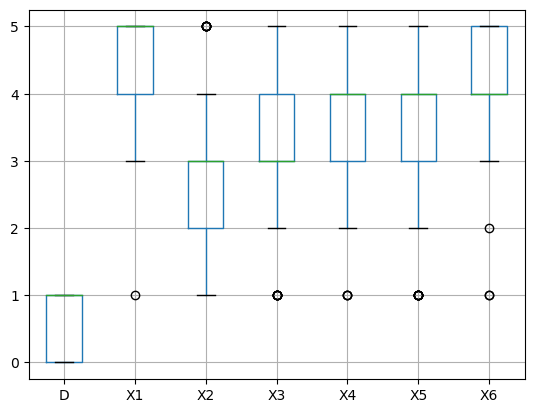

In [61]:
df.boxplot()

Выбросов нет, каждая переменная дискретная, изменяется от 1 до 5 (является категориальной)

## 3. Разведочный анализ

<Axes: ylabel='D'>

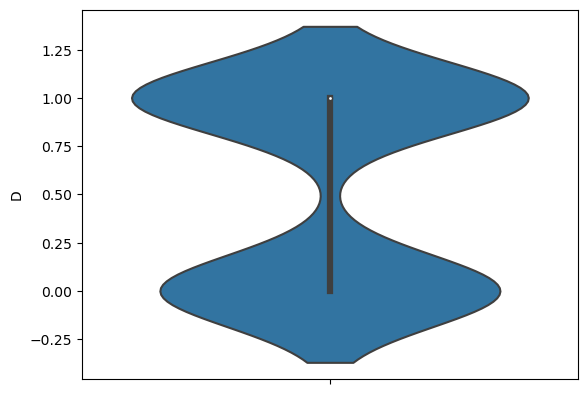

In [62]:
sns.violinplot(y = df.D)

Text(0.5, 0, 'the availability of information about the city services')

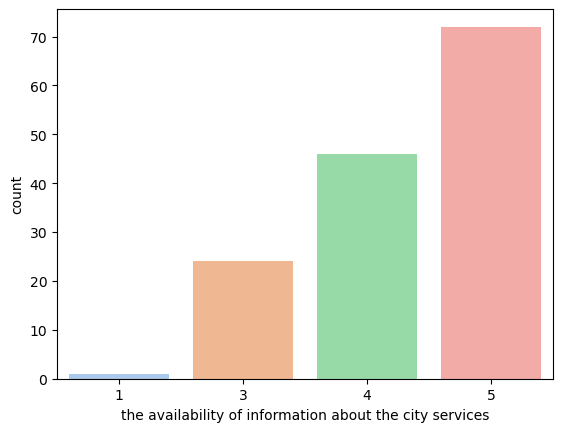

In [63]:
# the availability of information about the city services
sns.countplot(data=df, x='X1', palette='pastel')
plt.xlabel('the availability of information about the city services')

Text(0.5, 0, 'the cost of housing')

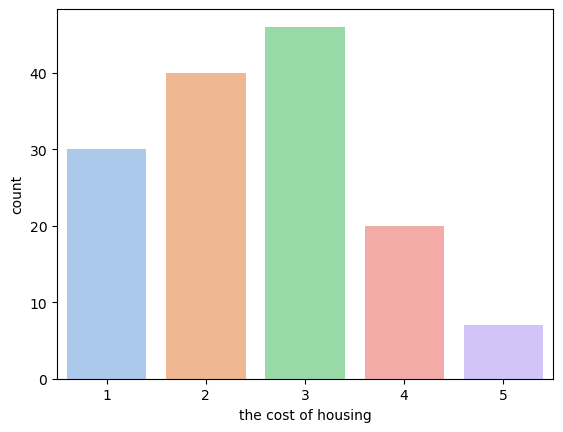

In [64]:
# the cost of housing
sns.countplot(data=df, x='X2', palette='pastel')
plt.xlabel('the cost of housing')

Text(0.5, 0, 'the overall quality of public schools')

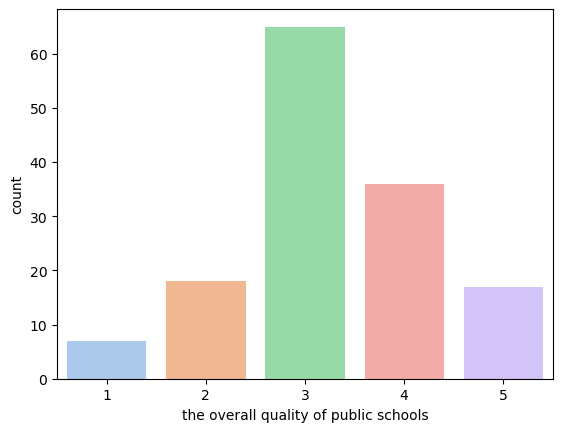

In [65]:
# the overall quality of public schools
sns.countplot(data=df, x='X3', palette='pastel')
plt.xlabel('the overall quality of public schools')

Text(0.5, 0, 'your trust in the local police')

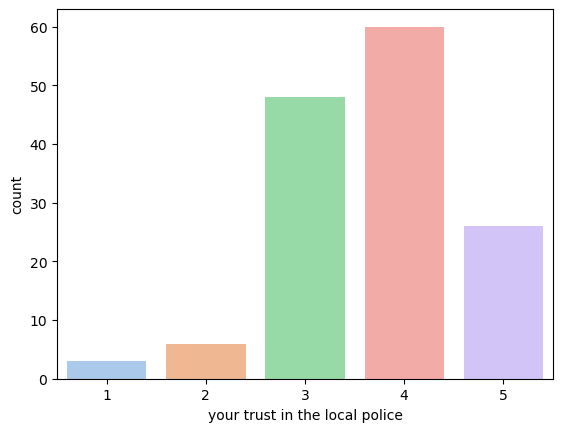

In [66]:
# your trust in the local police
sns.countplot(data=df, x='X4', palette='pastel')
plt.xlabel('your trust in the local police')

Text(0.5, 0, 'the maintenance of streets and sidewalks')

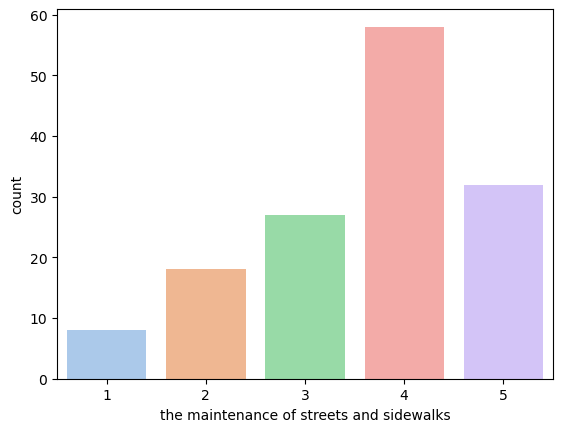

In [67]:
# the maintenance of streets and sidewalks 
sns.countplot(data=df, x='X5', palette='pastel')
plt.xlabel('the maintenance of streets and sidewalks')

Text(0.5, 0, 'the availability of social community events')

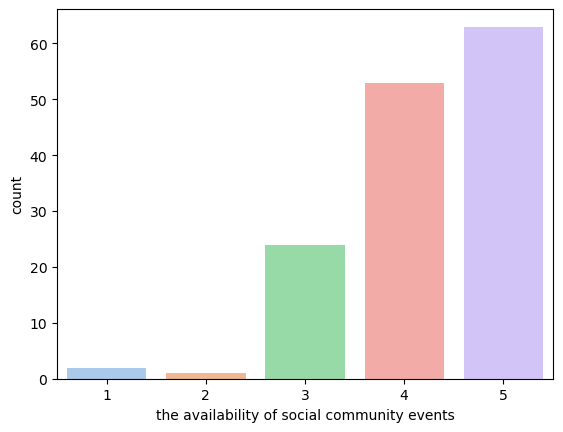

In [68]:
# the availability of social community events
sns.countplot(data=df, x='X6', palette='pastel')
plt.xlabel('the availability of social community events')

## Тепловая карта

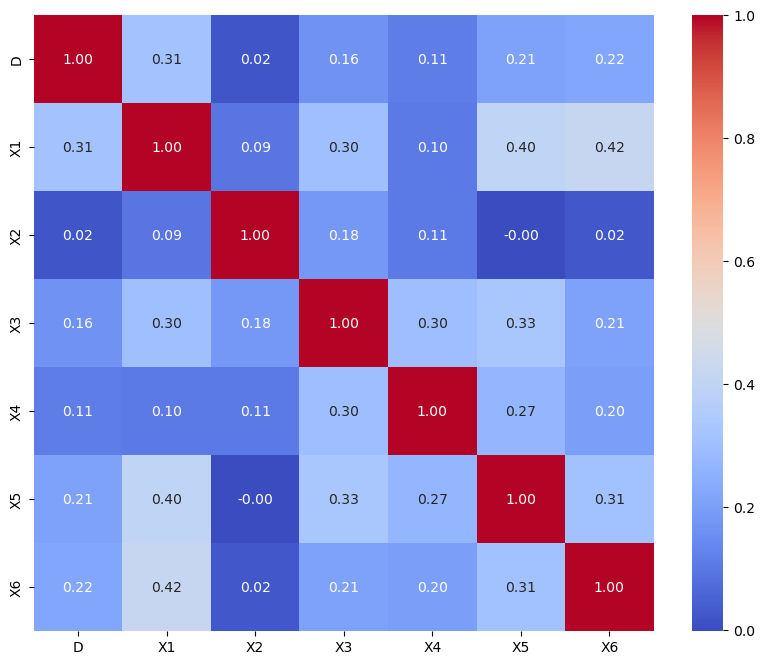

In [74]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()